In [5]:
#Import the necessary libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score

In [6]:
#Load the data
df=pd.read_csv('/content/BA - Assignment Part 1 data set.csv')

In [7]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [9]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [10]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [11]:
null_values = df.isnull().sum()
total_values = len(df)
percentage_null_values = (null_values / total_values) * 100
print(percentage_null_values)

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64


In [12]:
q1 = df['DaySinceLastOrder'].quantile(0.25)
q3 = df['DaySinceLastOrder'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[~((df['DaySinceLastOrder'] >= lower_bound) & (df['DaySinceLastOrder'] <= upper_bound))]

print(f"Number of outliers: {len(outliers)}")


Number of outliers: 369


In [13]:
# Fill the null value of column  DaySinceLastOrder with median and rest other with mode

df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

# Find the mode of each remaining column with missing values
mode_values = df.mode().iloc[0]

# Fill missing values in remaining columns with their respective modes
df.fillna(mode_values, inplace=True)


In [14]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

0    4682
1     948
Name: Churn, dtype: int64


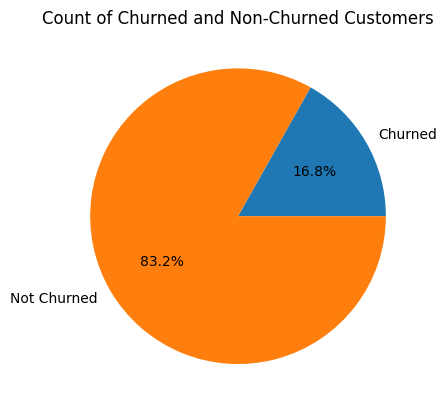

In [15]:
#Count of churn
churn_count = df['Churn'].value_counts()
print(churn_count)

import matplotlib.pyplot as plt

# Get the count of churned and non-churned customers
churned_count = df[df['Churn'] == True].shape[0]
non_churned_count = df[df['Churn'] == False].shape[0]

# Create a pie chart
plt.pie([churned_count, non_churned_count], labels=['Churned', 'Not Churned'], autopct="%1.1f%%")
plt.title('Count of Churned and Non-Churned Customers')
plt.show()


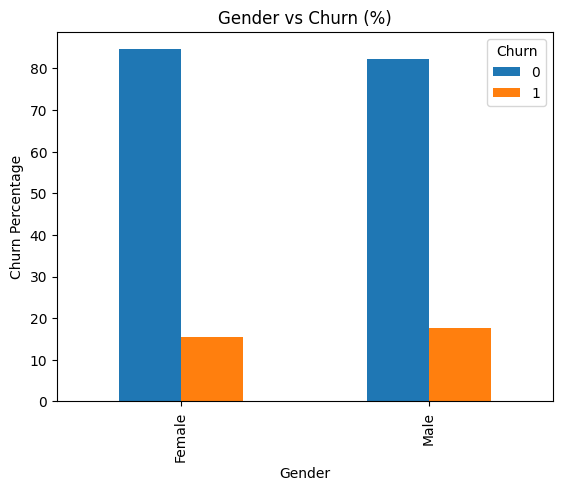

In [16]:
# Gender vs Churn and percentage show the label of percentage

import matplotlib.pyplot as plt

churn_by_gender = df.groupby('Gender')['Churn'].value_counts()

# Calculate the percentage of churn for each gender
churn_percentage = (churn_by_gender / churn_by_gender.groupby(level=0).sum()) * 100

# Create a bar chart to show the results
churn_percentage.unstack().plot(kind='bar')
plt.title('Gender vs Churn (%)')
plt.xlabel('Gender')
plt.ylabel('Churn Percentage')
plt.show()


In [17]:
# Count the chun and not churn male and female

churn_male = df[df['Churn'] == 1].groupby('Gender')['Gender'].count()['Male']
churn_female = df[df['Churn'] == 1].groupby('Gender')['Gender'].count()['Female']
nochurn_male = df[df['Churn'] == 0].groupby('Gender')['Gender'].count()['Male']
nochurn_female = df[df['Churn'] == 0].groupby('Gender')['Gender'].count()['Female']

print("Churned Male:", churn_male)
print("Churned Female:", churn_female)
print("Not Churned Male:", nochurn_male)
print("Not Churned Female:", nochurn_female)

Churned Male: 600
Churned Female: 348
Not Churned Male: 2784
Not Churned Female: 1898


In [18]:
#Churn and percentage show the label of percentage

churn_by_gender = df.groupby('Gender')['Churn'].value_counts()

# Calculate the percentage of churn for each gender
churn_percentage = (churn_by_gender / churn_by_gender.groupby(level=0).sum()) * 100

# Print the percentage of churn for each gender
print(churn_percentage)


Gender  Churn
Female  0        84.505788
        1        15.494212
Male    0        82.269504
        1        17.730496
Name: Churn, dtype: float64


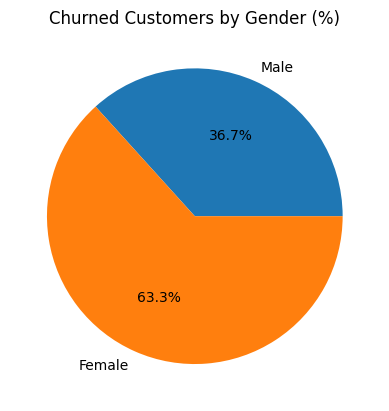

In [19]:
#Churn percentage show the label
import matplotlib.pyplot as plt

# Create a new dataframe with only churned customers
churned_df = df[df['Churn'] == 1]

# Group the churned customers by gender
churned_by_gender = churned_df.groupby('Gender')['Gender'].count()

# Calculate the percentage of churned customers for each gender
churned_percentage = (churned_by_gender / churned_by_gender.sum()) * 100

# Create a pie chart to show the results
plt.pie(churned_percentage, labels=['Male', 'Female'], autopct="%1.1f%%")
plt.title('Churned Customers by Gender (%)')
plt.show()


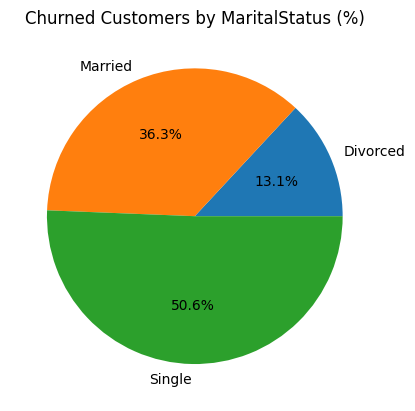

In [20]:
#MaritalStatus pie chart churn==1

import matplotlib.pyplot as plt
# Create a new dataframe with only churned customers
churned_df = df[df['Churn'] == 1]

# Group the churned customers by MaritalStatus
churned_by_maritalstatus = churned_df.groupby('MaritalStatus')['MaritalStatus'].count()

# Calculate the percentage of churned customers for each MaritalStatus
churned_percentage = (churned_by_maritalstatus / churned_by_maritalstatus.sum()) * 100

# Create a pie chart to show the results
plt.pie(churned_percentage, labels=churned_by_maritalstatus.index, autopct="%1.1f%%")
plt.title('Churned Customers by MaritalStatus (%)')
plt.show()


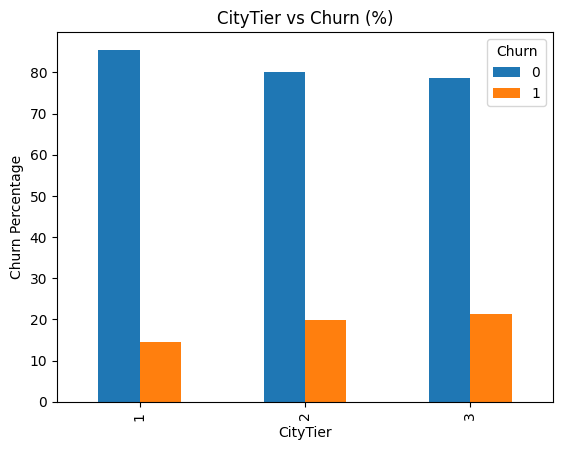

In [21]:
#CityTier vs churn

import matplotlib.pyplot as plt
# Group the data by CityTier and Churn
churn_by_city_tier = df.groupby('CityTier')['Churn'].value_counts()

# Calculate the percentage of churn for each CityTier
churn_percentage_by_city_tier = (churn_by_city_tier / churn_by_city_tier.groupby(level=0).sum()) * 100

# Create a bar chart to show the results
churn_percentage_by_city_tier.unstack().plot(kind='bar')
plt.title('CityTier vs Churn (%)')
plt.xlabel('CityTier')
plt.ylabel('Churn Percentage')
plt.show()


In [22]:
#PreferredLoginDevice vs churn percentage

# Group the data by PreferredLoginDevice and Churn
churn_by_preferred_login_device = df.groupby('PreferredLoginDevice')['Churn'].value_counts()

# Calculate the percentage of churn for each PreferredLoginDevice
churn_percentage_by_preferred_login_device = (churn_by_preferred_login_device / churn_by_preferred_login_device.groupby(level=0).sum()) * 100

# Print the percentage of churn for each PreferredLoginDevice
print(churn_percentage_by_preferred_login_device)


PreferredLoginDevice  Churn
Computer              0        80.171359
                      1        19.828641
Mobile Phone          0        87.414105
                      1        12.585895
Phone                 0        77.579204
                      1        22.420796
Name: Churn, dtype: float64


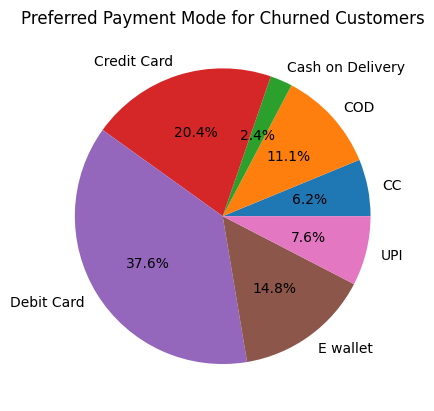

In [23]:
# Preferred Payment Mode for Churned Customers

import matplotlib.pyplot as plt
# Group the data by PreferredPaymentMode and Churn
churn_by_preferred_payment_mode = df[df['Churn'] == 1].groupby('PreferredPaymentMode')['PreferredPaymentMode'].count()

# Create a pie chart to show the results
plt.pie(churn_by_preferred_payment_mode, labels=churn_by_preferred_payment_mode.index, autopct="%1.1f%%")
plt.title('Preferred Payment Mode for Churned Customers')
plt.show()


        count        mean        std    min    25%    50%    75%    max
Churn                                                                  
0      4682.0  180.633704  50.422799    0.0  147.0  166.0  201.0  325.0
1       948.0  160.369198  38.413534  110.0  132.0  150.0  175.0  324.0


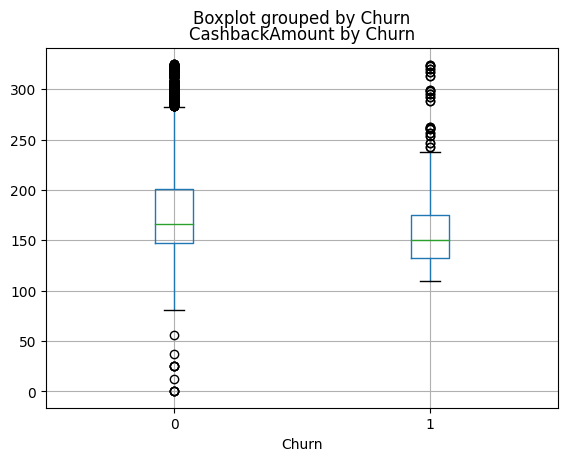

t-statistic: -11.7051, p-value: 0.0000
There is a statistically significant difference in the mean CashbackAmount between churned and non-churned customers.


In [24]:
# Eda on CashbackAmount with churn

import matplotlib.pyplot as plt

# Group the data by Churn and CashbackAmount
cashback_by_churn = df.groupby('Churn')['CashbackAmount'].describe()

# Print the descriptive statistics for each group
print(cashback_by_churn)

# Create a boxplot to visualize the distribution of CashbackAmount for each group
df.boxplot(column='CashbackAmount', by='Churn')
plt.title('CashbackAmount by Churn')
plt.show()

# Perform a t-test to compare the means of CashbackAmount for each group
from scipy.stats import ttest_ind

churned_cashback = df[df['Churn'] == 1]['CashbackAmount']
non_churned_cashback = df[df['Churn'] == 0]['CashbackAmount']

t_statistic, p_value = ttest_ind(churned_cashback, non_churned_cashback)

print(f"t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

# Interpret the results of the t-test
if p_value < 0.05:
  print("There is a statistically significant difference in the mean CashbackAmount between churned and non-churned customers.")
else:
  print("There is no statistically significant difference in the mean CashbackAmount between churned and non-churned customers.")


# Data Pre-processing and EDA

The above code performs exploratory data analysis (EDA) on a dataset containing information about customer churn. The analysis includes:

1. **Data Cleaning:**
    - Handling missing values by filling them with the median for the `DaySinceLastOrder` column and the mode for other columns.
    - Removing outliers in the `DaySinceLastOrder` column.

2. **Data Exploration:**
    - Calculating and visualizing the count of churned and non-churned customers.
    - Analyzing the relationship between gender and churn, including calculating the percentage of churn for each gender and creating a bar chart.
    - Investigating the distribution of churned customers by gender and marital status using pie charts.
    - Exploring the relationship between city tier and churn, calculating the percentage of churn for each city tier, and creating a bar chart.
    - Analyzing the preferred login device and preferred payment mode for churned customers.


Based on the analysis, several insights can be drawn:

- There is a higher proportion of churned customers among females compared to males.
- Churned customers are more likely to be single or divorced than married.
- Customers in lower city tiers have a higher churn rate.
- The most popular preferred login device for churned customers is the phone, followed by the computer.
- The most popular preferred payment mode for churned customers is debit card, followed by credit card and e-wallet.

These insights can be used to develop strategies to reduce customer churn, such as targeting specific customer segments with personalized offers and improving the customer experience.

<ipython-input-25-374e7cef12a4>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


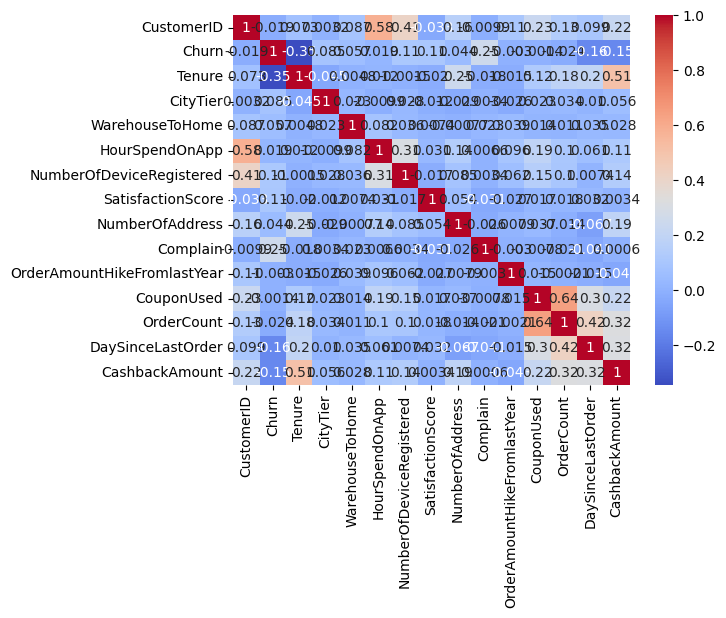

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [26]:
corr_churn = corr['Churn'].sort_values()
print(corr_churn)

Tenure                        -0.345379
DaySinceLastOrder             -0.155871
CashbackAmount                -0.154161
OrderCount                    -0.024038
CustomerID                    -0.019083
OrderAmountHikeFromlastYear   -0.003014
CouponUsed                    -0.001430
HourSpendOnApp                 0.018816
NumberOfAddress                0.043931
WarehouseToHome                0.056958
CityTier                       0.084703
SatisfactionScore              0.105481
NumberOfDeviceRegistered       0.107939
Complain                       0.250188
Churn                          1.000000
Name: Churn, dtype: float64


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [28]:
df['PreferredLoginDevice'].head(50)

0     Mobile Phone
1            Phone
2            Phone
3            Phone
4            Phone
5         Computer
6            Phone
7            Phone
8            Phone
9            Phone
10    Mobile Phone
11    Mobile Phone
12           Phone
13           Phone
14    Mobile Phone
15           Phone
16        Computer
17    Mobile Phone
18        Computer
19    Mobile Phone
20    Mobile Phone
21    Mobile Phone
22    Mobile Phone
23           Phone
24        Computer
25           Phone
26    Mobile Phone
27           Phone
28           Phone
29        Computer
30        Computer
31    Mobile Phone
32           Phone
33    Mobile Phone
34        Computer
35           Phone
36        Computer
37           Phone
38    Mobile Phone
39        Computer
40    Mobile Phone
41           Phone
42    Mobile Phone
43    Mobile Phone
44           Phone
45           Phone
46        Computer
47        Computer
48        Computer
49    Mobile Phone
Name: PreferredLoginDevice, dtype: object

In [29]:
# One hot encoding on   PreferredLoginDevice ,  PreferredPaymentMode  ,  PreferedOrderCat,MaritalStatus

import pandas as pd
# One-hot encoding for PreferredLoginDevice
preferred_login_device_dummies = pd.get_dummies(df['PreferredLoginDevice'], prefix='PreferredLoginDevice')

# One-hot encoding for PreferredPaymentMode
preferred_payment_mode_dummies = pd.get_dummies(df['PreferredPaymentMode'], prefix='PreferredPaymentMode')

# One-hot encoding for PreferedOrderCat
prefered_order_cat_dummies = pd.get_dummies(df['PreferedOrderCat'], prefix='PreferedOrderCat')

# One-hot encoding for MaritalStatus
marital_status_dummies = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')

# Replace the original columns with the one-hot encoded columns
df = pd.concat([df, preferred_login_device_dummies, preferred_payment_mode_dummies, prefered_order_cat_dummies, marital_status_dummies], axis=1)

# Drop the original columns
df.drop(['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus'], axis=1, inplace=True)

# Replace male:1, female:0
df.replace({'Male':1, 'Female':0},inplace=True)


In [30]:
df.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,...,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,0,3.0,3,2,9,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,1.0,1,8.0,1,3.0,4,3,7,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,1.0,1,30.0,1,2.0,4,3,6,...,0,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,1,2.0,4,5,8,...,0,0,0,1,0,0,0,0,0,1
4,50005,1,0.0,1,12.0,1,3.0,3,5,3,...,0,0,0,0,1,0,0,0,0,1


In [31]:
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [33]:
#shape of the test and train

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4504, 33)
(1126, 33)
(4504,)
(1126,)


In [34]:
# Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(random_state=142)
gbm_model.fit(X_train, y_train)

y_pred_gbm_train = gbm_model.predict(X_train)
y_pred_gbm_test = gbm_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_gbm_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_gbm_test))

print(classification_report(y_test, y_pred_gbm_test))

Train Accuracy: 0.9313943161634103
Test Accuracy: 0.9067495559502664
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       923
           1       0.85      0.59      0.69       203

    accuracy                           0.91      1126
   macro avg       0.88      0.78      0.82      1126
weighted avg       0.90      0.91      0.90      1126



# Summary of factors influencing churn and what ac-ons can be taken to prevent customer churn in text

### Factors influencing churn:

- **Gender:** Females have a higher churn rate than males.
- **Marital status:** Single and divorced customers have a higher churn rate than married customers.
- **City tier:** Customers in lower city tiers have a higher churn rate.
- **Preferred login device:** Customers who prefer to use the phone have a higher churn rate.
- **Preferred payment mode:** Customers who prefer to use debit card have a higher churn rate.
- **Cashback amount:** Churned customers have a lower average cashback amount than non-churned customers.

### Actions to prevent customer churn:

- **Target specific customer segments with personalized offers:** For example, offer discounts or promotions to females, debit card user, single or divorced customers, and customers in lower city tiers.
- **Improve the customer experience:** This could involve making it easier to provide better customer support or offering more convenient payment options.
- **Increase customer engagement:** This could involve sending out regular newsletters, offering loyalty programs, or creating a community forum.
- **Monitor customer behavior:** This could involve tracking customer activity on the phone or computer, or sending out surveys to gauge customer satisfaction.
- **Take action to address customer concerns:** If customers are experiencing problems with the product or service, take steps to resolve these issues quickly and efficiently.
